# 📊 Instagram Rétrospective - Analyse Personnalisée

Analysez vos données Instagram sur n'importe quelle période.
instagram-retrospective-analyse-personnalisee

## 📋 Instructions rapides
1. Téléchargez vos données Instagram
2. Placez le dossier `your_instagram_activity` dans le même répertoire
3. **Configurez la période d'analyse** dans la cellule suivante
4. Exécutez les cellules dans l'ordre

## 1️⃣ Configuration

In [15]:
import json
import os
from pathlib import Path
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def fix_encoding(text):
    try:
        return text.encode('latin1').decode('utf-8')
    except:
        return text

# ⚙️ CONFIGURATION
YOUR_NAME_PATTERN = "Maxim"  # Modifiez avec votre prénom

# 📅 PÉRIODE D'ANALYSE - Choisissez l'une des options:

# Option 1: Analyser une année complète
YEAR_FILTER = 2025
START_DATE = None
END_DATE = None

# Option 2: Analyser une période spécifique (décommentez les lignes ci-dessous)
# START_DATE = datetime(2025, 1, 1)   # Début: 1er janvier 2025
# END_DATE = datetime(2025, 6, 30)    # Fin: 30 juin 2025  
# YEAR_FILTER = None  # Mettre à None quand vous utilisez START_DATE/END_DATE

# Option 3: Analyser les 6 derniers mois
# from datetime import timedelta
# END_DATE = datetime.now()
# START_DATE = END_DATE - timedelta(days=180)
# YEAR_FILTER = None

def filter_timestamp(timestamp):
    """Vérifie si un timestamp est dans la période sélectionnée"""
    if YEAR_FILTER:
        return timestamp.year == YEAR_FILTER
    elif START_DATE and END_DATE:
        return START_DATE <= timestamp <= END_DATE
    else:
        return True

# Afficher la période
if YEAR_FILTER:
    period_text = f"Année {YEAR_FILTER}"
elif START_DATE and END_DATE:
    period_text = f"Du {START_DATE.strftime('%d/%m/%Y')} au {END_DATE.strftime('%d/%m/%Y')}"
else:
    period_text = "Toutes les données"

print(f"✅ Configuration terminée")
print(f"📅 Période d'analyse: {period_text}")

✅ Configuration terminée
📅 Période d'analyse: Année 2025


## 2️⃣ Analyse des Messages

In [16]:
base_path = Path("your_instagram_activity/messages/inbox")

stats = {
    "total_conversations": 0,
    "total_messages": 0,
    "messages_sent": 0,
    "messages_received": 0,
    "total_chars_sent": 0,
    "total_chars_received": 0,
    "conversations_data": [],
    "hourly_distribution": Counter(),
    "daily_distribution": Counter(),
    "monthly_distribution": Counter(),
}

print(f"🔄 Analyse en cours pour: {period_text}...")

for conv_folder in base_path.iterdir():
    if not conv_folder.is_dir():
        continue
    
    for json_file in conv_folder.glob("*.json"):
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        participants = [fix_encoding(p['name']) for p in data.get('participants', [])]
        your_name = next((p for p in participants if YOUR_NAME_PATTERN in p), None)
        
        if not your_name:
            continue
        
        title = fix_encoding(data.get("title", "Unknown"))
        
        conv_stats = {
            "name": title,
            "total": 0,
            "sent": 0,
            "received": 0,
            "chars_sent": 0,
            "chars_received": 0,
        }
        
        for msg in data.get("messages", []):
            content = msg.get("content")
            if not content:
                continue
            
            timestamp = datetime.fromtimestamp(msg["timestamp_ms"] / 1000)
            
            if not filter_timestamp(timestamp):
                continue
            
            content = fix_encoding(content)
            stats["total_messages"] += 1
            conv_stats["total"] += 1
            
            sender = fix_encoding(msg["sender_name"])
            
            stats["hourly_distribution"][timestamp.hour] += 1
            stats["daily_distribution"][timestamp.strftime("%A")] += 1
            stats["monthly_distribution"][timestamp.strftime("%Y-%m")] += 1
            
            if sender == your_name:
                stats["messages_sent"] += 1
                stats["total_chars_sent"] += len(content)
                conv_stats["sent"] += 1
                conv_stats["chars_sent"] += len(content)
            else:
                stats["messages_received"] += 1
                stats["total_chars_received"] += len(content)
                conv_stats["received"] += 1
                conv_stats["chars_received"] += len(content)
        
        if conv_stats["total"] > 0:
            stats["total_conversations"] += 1
            stats["conversations_data"].append(conv_stats)

stats["conversations_data"].sort(key=lambda x: x["total"], reverse=True)

print(f"\n✅ Analyse terminée!")
print(f"\n📊 STATISTIQUES - {period_text}")
print(f"Conversations: {stats['total_conversations']}")
print(f"Messages totaux: {stats['total_messages']:,}")
if stats['total_messages'] > 0:
    print(f"Envoyés: {stats['messages_sent']:,} ({stats['messages_sent']/stats['total_messages']*100:.1f}%)")
    print(f"Reçus: {stats['messages_received']:,} ({stats['messages_received']/stats['total_messages']*100:.1f}%)")
    if stats['messages_sent'] > 0:
        print(f"Moyenne chars/msg envoyé: {stats['total_chars_sent']/stats['messages_sent']:.1f}")
else:
    print("⚠️ Aucun message trouvé pour cette période")

if stats['total_messages'] > 0:
    print(f"\n🔥 TOP 10 CONVERSATIONS")
    for i, conv in enumerate(stats["conversations_data"][:10], 1):
        print(f"{i}. {conv['name']}: {conv['total']:,} msgs")

🔄 Analyse en cours pour: Année 2025...

✅ Analyse terminée!

📊 STATISTIQUES - Année 2025
Conversations: 98
Messages totaux: 21,616
Envoyés: 9,583 (44.3%)
Reçus: 12,033 (55.7%)
Moyenne chars/msg envoyé: 32.8

🔥 TOP 10 CONVERSATIONS
1. Miss Nazar: 5,361 msgs
2. Sylvain Cressenville: 4,869 msgs
3. Navire du célibat: 3,490 msgs
4. lebrod'0: 1,326 msgs
5. Christopher Marena: 1,242 msgs
6. ᴹᴱᴿᴱ☾: 962 msgs
7. Lucas Berenguier: 836 msgs
8. yana zanni: 664 msgs
9. Valentyn Cuynat: 324 msgs
10. Edwin Treny: 257 msgs


### 📈 Evolution Mensuelle - Top 5

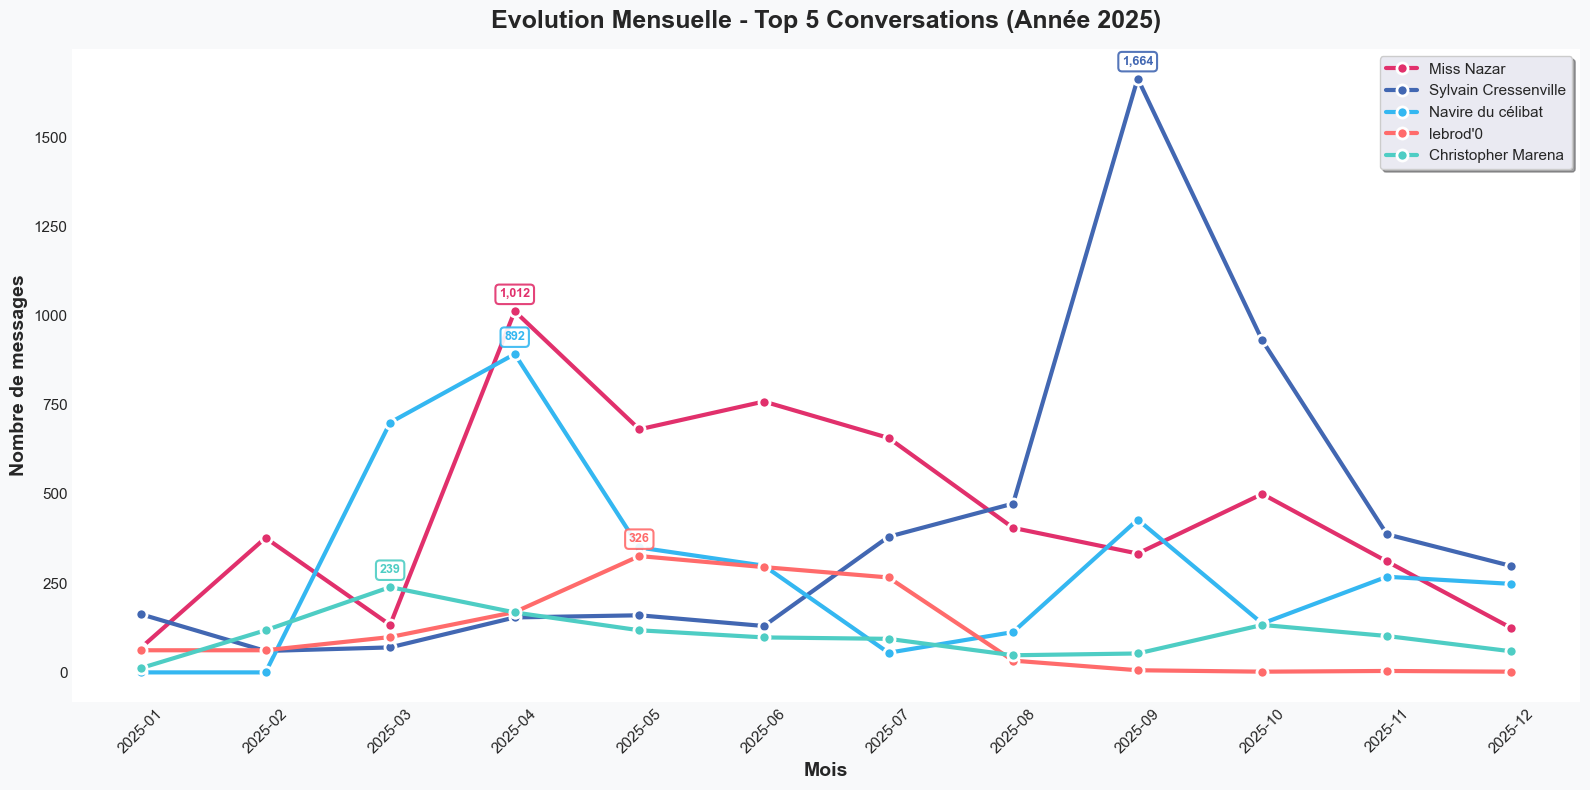


✅ Graphique sauvegardé: top5_evolution_mensuelle.png


In [17]:
if stats['total_messages'] == 0:
    print("⚠️ Pas de données à afficher")
else:
    top_5_convs = stats["conversations_data"][:5]
    top_5_names = [c['name'] for c in top_5_convs]
    monthly_data = {name: Counter() for name in top_5_names}

    for conv_folder in base_path.iterdir():
        if not conv_folder.is_dir():
            continue
        
        for json_file in conv_folder.glob("*.json"):
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            participants = [fix_encoding(p['name']) for p in data.get('participants', [])]
            your_name = next((p for p in participants if YOUR_NAME_PATTERN in p), None)
            
            if not your_name:
                continue
            
            title = fix_encoding(data.get("title", "Unknown"))
            
            if title not in top_5_names:
                continue
            
            for msg in data.get("messages", []):
                if not msg.get("content"):
                    continue
                
                timestamp = datetime.fromtimestamp(msg["timestamp_ms"] / 1000)
                
                if not filter_timestamp(timestamp):
                    continue
                
                month = timestamp.strftime("%Y-%m")
                monthly_data[title][month] += 1

    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('#f8f9fa')
    ax.set_facecolor('white')

    all_months = sorted(set(month for person_data in monthly_data.values() for month in person_data.keys()))
    colors_palette = ['#E1306C', '#4267B2', '#34B7F1', '#FF6B6B', '#4ECDC4']

    for idx, (name, color) in enumerate(zip(top_5_names, colors_palette)):
        counts = [monthly_data[name][month] for month in all_months]
        ax.plot(all_months, counts, marker='o', linewidth=3, markersize=8, 
                label=name[:25], color=color, markerfacecolor=color,
                markeredgecolor='white', markeredgewidth=2)

    ax.set_xlabel('Mois', fontsize=14, fontweight='bold')
    ax.set_ylabel('Nombre de messages', fontsize=14, fontweight='bold')
    ax.set_title(f'Evolution Mensuelle - Top 5 Conversations ({period_text})', fontsize=18, fontweight='bold', pad=15)
    ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

    for name, color in zip(top_5_names, colors_palette):
        if monthly_data[name]:
            peak_month, peak_count = monthly_data[name].most_common(1)[0]
            if peak_month in all_months:
                month_idx = all_months.index(peak_month)
                ax.annotate(f'{peak_count:,}', 
                            xy=(month_idx, peak_count),
                            xytext=(0, 10), textcoords='offset points',
                            ha='center', fontsize=9, fontweight='bold',
                            color=color,
                            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                                     edgecolor=color, linewidth=1.5, alpha=0.9))

    plt.tight_layout()
    plt.savefig('top5_evolution_mensuelle.png', dpi=150, bbox_inches='tight', facecolor='#f8f9fa')
    plt.show()

    print("\n✅ Graphique sauvegardé: top5_evolution_mensuelle.png")

### 📊 Graphiques Messages

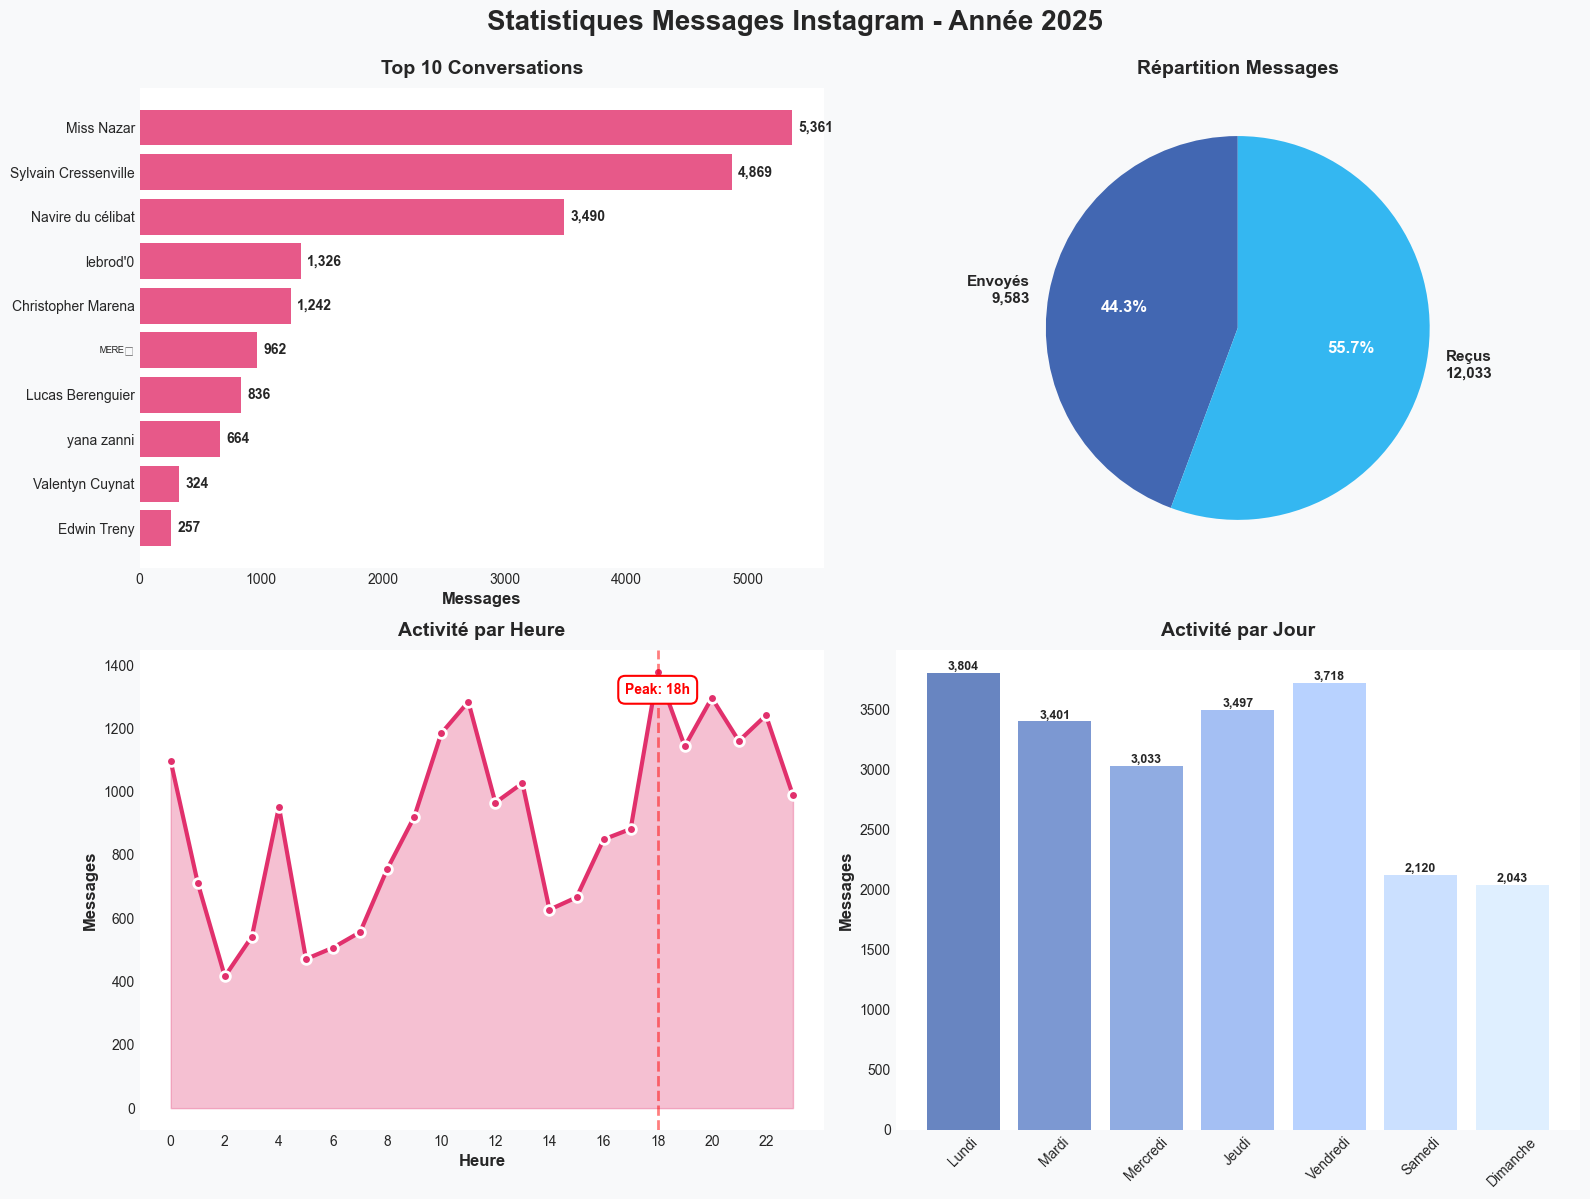


✅ Graphique sauvegardé: messages_stats.png


In [18]:
if stats['total_messages'] == 0:
    print("⚠️ Pas de données à afficher")
else:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Statistiques Messages Instagram - {period_text}', fontsize=20, fontweight='bold', y=0.995)
    fig.patch.set_facecolor('#f8f9fa')

    colors = {'primary': '#E1306C', 'secondary': '#4267B2', 'accent': '#34B7F1'}

    # 1. Top 10 Conversations
    ax1 = axes[0, 0]
    ax1.set_facecolor('white')
    top_10 = stats["conversations_data"][:10]
    names = [c['name'][:25] for c in top_10]
    totals = [c['total'] for c in top_10]
    bars = ax1.barh(names, totals, color=colors['primary'], alpha=0.8)
    ax1.set_xlabel('Messages', fontsize=12, fontweight='bold')
    ax1.set_title('Top 10 Conversations', fontsize=14, fontweight='bold', pad=10)
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    for bar, count in zip(bars, totals):
        width = bar.get_width()
        ax1.text(width + max(totals)*0.01, bar.get_y() + bar.get_height()/2, 
                 f'{count:,}', va='center', fontweight='bold', fontsize=10)

    # 2. Répartition Envoyés/Reçus
    ax2 = axes[0, 1]
    ax2.set_facecolor('white')
    pie_data = [stats['messages_sent'], stats['messages_received']]
    pie_labels = [f"Envoyés\n{stats['messages_sent']:,}", f"Reçus\n{stats['messages_received']:,}"]
    wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                         startangle=90, colors=[colors['secondary'], colors['accent']],
                                         textprops={'fontsize': 11, 'fontweight': 'bold'})
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    ax2.set_title('Répartition Messages', fontsize=14, fontweight='bold', pad=10)

    # 3. Distribution Horaire
    ax3 = axes[1, 0]
    ax3.set_facecolor('white')
    hours = sorted(stats["hourly_distribution"].keys())
    hour_counts = [stats["hourly_distribution"][h] for h in hours]
    ax3.plot(hours, hour_counts, marker='o', linewidth=3, markersize=7, 
             color=colors['primary'], markerfacecolor=colors['primary'],
             markeredgecolor='white', markeredgewidth=2)
    ax3.fill_between(hours, hour_counts, alpha=0.3, color=colors['primary'])
    ax3.set_xlabel('Heure', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Messages', fontsize=12, fontweight='bold')
    ax3.set_title('Activité par Heure', fontsize=14, fontweight='bold', pad=10)
    ax3.set_xticks(range(0, 24, 2))
    ax3.grid(True, alpha=0.3, linestyle='--')
    if stats['hourly_distribution']:
        peak_hour = stats['hourly_distribution'].most_common(1)[0]
        ax3.axvline(x=peak_hour[0], color='red', linestyle='--', alpha=0.5, linewidth=2)
        ax3.text(peak_hour[0], max(hour_counts)*0.95, f'Peak: {peak_hour[0]}h', 
                 ha='center', fontsize=10, fontweight='bold', color='red',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='red', linewidth=1.5))

    # 4. Distribution par Jour
    ax4 = axes[1, 1]
    ax4.set_facecolor('white')
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    days_fr = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
    day_counts = [stats["daily_distribution"][d] for d in days_order]
    colors_days = ['#4267B2', '#5B7FC7', '#7497DB', '#8DAFF0', '#A6C7FF', '#BFD9FF', '#D8EBFF']
    bars = ax4.bar(days_fr, day_counts, color=colors_days, alpha=0.8)
    ax4.set_ylabel('Messages', fontsize=12, fontweight='bold')
    ax4.set_title('Activité par Jour', fontsize=14, fontweight='bold', pad=10)
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(axis='y', alpha=0.3, linestyle='--')
    for bar, count in zip(bars, day_counts):
        height = bar.get_height()
        if height > 0:
            ax4.text(bar.get_x() + bar.get_width()/2., height, 
                     f'{count:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.savefig('messages_stats.png', dpi=150, bbox_inches='tight', facecolor='#f8f9fa')
    plt.show()

    print("\n✅ Graphique sauvegardé: messages_stats.png")

## 3️⃣ Analyse des Réactions

In [19]:
reactions_stats = {
    "reactions_given": 0,
    "reactions_received": 0,
    "reactions_given_by_emoji": Counter(),
    "reactions_received_by_emoji": Counter(),
    "top_reactors": Counter(),
}

print(f"🔄 Analyse des réactions pour: {period_text}...")

for conv_folder in base_path.iterdir():
    if not conv_folder.is_dir():
        continue
    
    for json_file in conv_folder.glob("*.json"):
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        participants = [fix_encoding(p['name']) for p in data.get('participants', [])]
        your_name = next((p for p in participants if YOUR_NAME_PATTERN in p), None)
        
        if not your_name:
            continue
        
        for msg in data.get("messages", []):
            timestamp = datetime.fromtimestamp(msg["timestamp_ms"] / 1000)
            
            if not filter_timestamp(timestamp):
                continue
            
            reactions = msg.get("reactions", [])
            
            for reaction in reactions:
                actor = fix_encoding(reaction["actor"])
                emoji = fix_encoding(reaction["reaction"])
                
                if actor == your_name:
                    reactions_stats["reactions_given"] += 1
                    reactions_stats["reactions_given_by_emoji"][emoji] += 1
                else:
                    reactions_stats["reactions_received"] += 1
                    reactions_stats["reactions_received_by_emoji"][emoji] += 1
                    reactions_stats["top_reactors"][actor] += 1

print(f"\n✅ Analyse terminée!")
print(f"\nRéactions données: {reactions_stats['reactions_given']:,}")
print(f"Réactions reçues: {reactions_stats['reactions_received']:,}")

if reactions_stats["reactions_given_by_emoji"]:
    print(f"\nTOP 5 EMOJIS DONNÉS")
    for emoji, count in reactions_stats["reactions_given_by_emoji"].most_common(5):
        print(f"{emoji}: {count:,}")

if reactions_stats["reactions_received_by_emoji"]:
    print(f"\nTOP 5 EMOJIS REÇUS")
    for emoji, count in reactions_stats["reactions_received_by_emoji"].most_common(5):
        print(f"{emoji}: {count:,}")

🔄 Analyse des réactions pour: Année 2025...

✅ Analyse terminée!

Réactions données: 2,409
Réactions reçues: 3,643

TOP 5 EMOJIS DONNÉS
❤: 1,133
💙: 808
😂: 239
💫: 73
❤️: 37

TOP 5 EMOJIS REÇUS
❤: 1,199
💜: 1,085
😂: 1,072
❤️: 126
👍: 68


### 📊 Graphiques Réactions

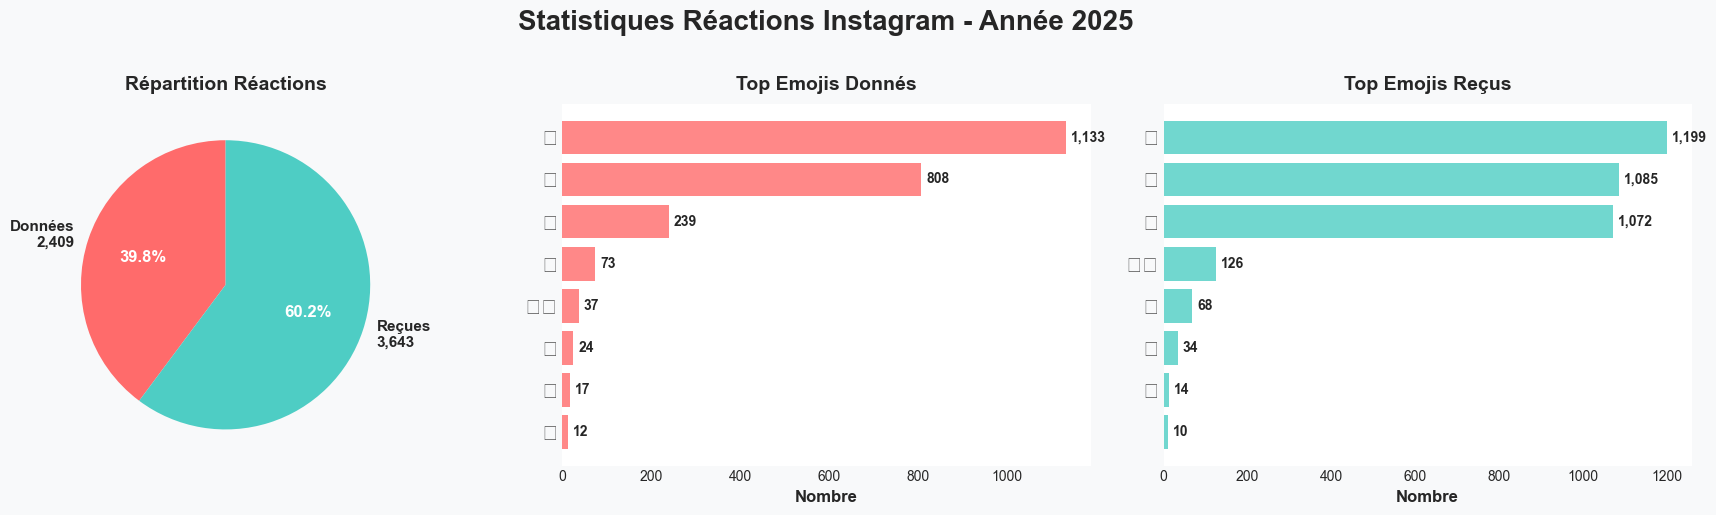


✅ Graphique sauvegardé: reactions_stats.png


In [20]:
if reactions_stats['reactions_given'] == 0 and reactions_stats['reactions_received'] == 0:
    print("⚠️ Pas de réactions pour cette période")
else:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Statistiques Réactions Instagram - {period_text}', fontsize=20, fontweight='bold', y=1.02)
    fig.patch.set_facecolor('#f8f9fa')

    # 1. Pie chart répartition
    ax1 = axes[0]
    ax1.set_facecolor('white')
    reaction_data = [reactions_stats['reactions_given'], reactions_stats['reactions_received']]
    reaction_labels = [f"Données\n{reactions_stats['reactions_given']:,}", 
                       f"Reçues\n{reactions_stats['reactions_received']:,}"]
    wedges, texts, autotexts = ax1.pie(reaction_data, labels=reaction_labels, autopct='%1.1f%%', 
                                         startangle=90, colors=['#FF6B6B', '#4ECDC4'],
                                         textprops={'fontsize': 11, 'fontweight': 'bold'})
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    ax1.set_title('Répartition Réactions', fontsize=14, fontweight='bold', pad=10)

    # 2. Top Emojis Donnés
    ax2 = axes[1]
    ax2.set_facecolor('white')
    top_emojis_given = reactions_stats["reactions_given_by_emoji"].most_common(8)
    if top_emojis_given:
        emojis = [e[0] for e in top_emojis_given]
        counts = [e[1] for e in top_emojis_given]
        bars = ax2.barh(range(len(emojis)), counts, color='#FF6B6B', alpha=0.8)
        ax2.set_yticks(range(len(emojis)))
        ax2.set_yticklabels(emojis, fontsize=16)
        ax2.set_xlabel('Nombre', fontsize=12, fontweight='bold')
        ax2.set_title('Top Emojis Donnés', fontsize=14, fontweight='bold', pad=10)
        ax2.invert_yaxis()
        ax2.grid(axis='x', alpha=0.3, linestyle='--')
        for bar, count in zip(bars, counts):
            width = bar.get_width()
            ax2.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2, 
                     f'{count:,}', va='center', fontweight='bold', fontsize=10)
    else:
        ax2.text(0.5, 0.5, 'Pas de données', ha='center', va='center', fontsize=14)
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)

    # 3. Top Emojis Reçus
    ax3 = axes[2]
    ax3.set_facecolor('white')
    top_emojis_received = reactions_stats["reactions_received_by_emoji"].most_common(8)
    if top_emojis_received:
        emojis = [e[0] for e in top_emojis_received]
        counts = [e[1] for e in top_emojis_received]
        bars = ax3.barh(range(len(emojis)), counts, color='#4ECDC4', alpha=0.8)
        ax3.set_yticks(range(len(emojis)))
        ax3.set_yticklabels(emojis, fontsize=16)
        ax3.set_xlabel('Nombre', fontsize=12, fontweight='bold')
        ax3.set_title('Top Emojis Reçus', fontsize=14, fontweight='bold', pad=10)
        ax3.invert_yaxis()
        ax3.grid(axis='x', alpha=0.3, linestyle='--')
        for bar, count in zip(bars, counts):
            width = bar.get_width()
            ax3.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2, 
                     f'{count:,}', va='center', fontweight='bold', fontsize=10)
    else:
        ax3.text(0.5, 0.5, 'Pas de données', ha='center', va='center', fontsize=14)
        ax3.set_xlim(0, 1)
        ax3.set_ylim(0, 1)

    plt.tight_layout()
    plt.savefig('reactions_stats.png', dpi=150, bbox_inches='tight', facecolor='#f8f9fa')
    plt.show()

    print("\n✅ Graphique sauvegardé: reactions_stats.png")

## 4️⃣ Analyse Complète des Médias (Audio, Photos, Vidéos, Reels)

In [21]:
# Analyse Complète des Médias (Audio, Photos, Vidéos, Reels)
def estimate_audio_duration(file_path):
    try:
        size_bytes = os.path.getsize(file_path)
        duration = (size_bytes * 8) / (68 * 1000)
        return duration
    except:
        return 0

def estimate_video_duration(file_path):
    try:
        size_bytes = os.path.getsize(file_path)
        duration = (size_bytes * 8) / (400 * 1000)
        return duration
    except:
        return 0

def format_duration(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = int(seconds % 60)
    if hours > 0:
        return f"{hours}h {minutes}m {secs}s"
    elif minutes > 0:
        return f"{minutes}m {secs}s"
    else:
        return f"{secs}s"

media_stats = {
    # Audio
    "total_audio_sent": 0,
    "total_audio_received": 0,
    "total_duration_audio_sent": 0,
    "total_duration_audio_received": 0,
    "audio_by_hour": Counter(),
    "audio_by_month": Counter(),
    "conversations_audio": [],

    # Photos
    "total_photos_sent": 0,
    "total_photos_received": 0,
    "photos_by_hour": Counter(),
    "photos_by_month": Counter(),
    "conversations_photos": [],

    # Vidéos
    "total_videos_sent": 0,
    "total_videos_received": 0,
    "total_duration_videos_sent": 0,
    "total_duration_videos_received": 0,
    "videos_by_hour": Counter(),
    "videos_by_month": Counter(),
    "conversations_videos": [],

    # GIFs
    "total_gifs_sent": 0,
    "total_gifs_received": 0,
    "gifs_by_hour": Counter(),
    "conversations_gifs": [],

    # Shares (posts, reels, stories partagés)
    "total_shares_sent": 0,
    "total_shares_received": 0,
    "conversations_shares": [],
}

print(f"🔄 Analyse des médias pour: {period_text}...")

for conv_folder in base_path.iterdir():
    if not conv_folder.is_dir():
        continue

    for json_file in conv_folder.glob("*.json"):
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)

        participants = [fix_encoding(p['name']) for p in data.get('participants', [])]
        your_name = next((p for p in participants if YOUR_NAME_PATTERN in p), None)

        if not your_name:
            continue

        title = fix_encoding(data.get("title", "Unknown"))

        conv_stats = {
            "name": title,
            "audio_sent": 0, "audio_received": 0,
            "audio_duration_sent": 0, "audio_duration_received": 0,
            "photos_sent": 0, "photos_received": 0,
            "videos_sent": 0, "videos_received": 0,
            "videos_duration_sent": 0, "videos_duration_received": 0,
            "gifs_sent": 0, "gifs_received": 0,
            "shares_sent": 0, "shares_received": 0,
        }

        for msg in data.get("messages", []):
            timestamp = datetime.fromtimestamp(msg["timestamp_ms"] / 1000)

            if not filter_timestamp(timestamp):
                continue

            sender = fix_encoding(msg["sender_name"])
            is_sent = sender == your_name
            hour = timestamp.hour
            month = timestamp.strftime("%Y-%m")

            # AUDIO
            if "audio_files" in msg:
                for audio in msg["audio_files"]:
                    audio_path = Path(audio["uri"])
                    duration = estimate_audio_duration(audio_path)

                    if is_sent:
                        media_stats["total_audio_sent"] += 1
                        media_stats["total_duration_audio_sent"] += duration
                        conv_stats["audio_sent"] += 1
                        conv_stats["audio_duration_sent"] += duration
                    else:
                        media_stats["total_audio_received"] += 1
                        media_stats["total_duration_audio_received"] += duration
                        conv_stats["audio_received"] += 1
                        conv_stats["audio_duration_received"] += duration

                    media_stats["audio_by_hour"][hour] += 1
                    media_stats["audio_by_month"][month] += 1

            # PHOTOS
            if "photos" in msg:
                count = len(msg["photos"])
                if is_sent:
                    media_stats["total_photos_sent"] += count
                    conv_stats["photos_sent"] += count
                else:
                    media_stats["total_photos_received"] += count
                    conv_stats["photos_received"] += count

                media_stats["photos_by_hour"][hour] += count
                media_stats["photos_by_month"][month] += count

            # VIDÉOS
            if "videos" in msg:
                for video in msg["videos"]:
                    video_path = Path(video["uri"])
                    duration = estimate_video_duration(video_path)

                    if is_sent:
                        media_stats["total_videos_sent"] += 1
                        media_stats["total_duration_videos_sent"] += duration
                        conv_stats["videos_sent"] += 1
                        conv_stats["videos_duration_sent"] += duration
                    else:
                        media_stats["total_videos_received"] += 1
                        media_stats["total_duration_videos_received"] += duration
                        conv_stats["videos_received"] += 1
                        conv_stats["videos_duration_received"] += duration

                    media_stats["videos_by_hour"][hour] += 1
                    media_stats["videos_by_month"][month] += 1

            # GIFs
            if "gifs" in msg:
                count = len(msg["gifs"])
                if is_sent:
                    media_stats["total_gifs_sent"] += count
                    conv_stats["gifs_sent"] += count
                else:
                    media_stats["total_gifs_received"] += count
                    conv_stats["gifs_received"] += count

                media_stats["gifs_by_hour"][hour] += count

            # SHARES (posts, reels, stories)
            if "share" in msg:
                if is_sent:
                    media_stats["total_shares_sent"] += 1
                    conv_stats["shares_sent"] += 1
                else:
                    media_stats["total_shares_received"] += 1
                    conv_stats["shares_received"] += 1

        # Sauvegarder si au moins un média
        if any([conv_stats["audio_sent"], conv_stats["audio_received"]]):
            media_stats["conversations_audio"].append({
                "name": conv_stats["name"],
                "sent": conv_stats["audio_sent"],
                "received": conv_stats["audio_received"],
                "duration_sent": conv_stats["audio_duration_sent"],
                "duration_received": conv_stats["audio_duration_received"]
            })

        if any([conv_stats["photos_sent"], conv_stats["photos_received"]]):
            media_stats["conversations_photos"].append({
                "name": conv_stats["name"],
                "sent": conv_stats["photos_sent"],
                "received": conv_stats["photos_received"]
            })

        if any([conv_stats["videos_sent"], conv_stats["videos_received"]]):
            media_stats["conversations_videos"].append({
                "name": conv_stats["name"],
                "sent": conv_stats["videos_sent"],
                "received": conv_stats["videos_received"],
                "duration_sent": conv_stats["videos_duration_sent"],
                "duration_received": conv_stats["videos_duration_received"]
            })

        if any([conv_stats["gifs_sent"], conv_stats["gifs_received"]]):
            media_stats["conversations_gifs"].append({
                "name": conv_stats["name"],
                "sent": conv_stats["gifs_sent"],
                "received": conv_stats["gifs_received"]
            })

        if any([conv_stats["shares_sent"], conv_stats["shares_received"]]):
            media_stats["conversations_shares"].append({
                "name": conv_stats["name"],
                "sent": conv_stats["shares_sent"],
                "received": conv_stats["shares_received"]
            })

# Trier les conversations
media_stats["conversations_audio"].sort(key=lambda x: x["sent"] + x["received"], reverse=True)
media_stats["conversations_photos"].sort(key=lambda x: x["sent"] + x["received"], reverse=True)
media_stats["conversations_videos"].sort(key=lambda x: x["sent"] + x["received"], reverse=True)
media_stats["conversations_gifs"].sort(key=lambda x: x["sent"] + x["received"], reverse=True)
media_stats["conversations_shares"].sort(key=lambda x: x["sent"] + x["received"], reverse=True)

# Statistiques globales
total_audio = media_stats['total_audio_sent'] + media_stats['total_audio_received']
total_audio_duration = media_stats['total_duration_audio_sent'] + media_stats['total_duration_audio_received']
total_photos = media_stats['total_photos_sent'] + media_stats['total_photos_received']
total_videos = media_stats['total_videos_sent'] + media_stats['total_videos_received']
total_videos_duration = media_stats['total_duration_videos_sent'] + media_stats['total_duration_videos_received']
total_gifs = media_stats['total_gifs_sent'] + media_stats['total_gifs_received']
total_shares = media_stats['total_shares_sent'] + media_stats['total_shares_received']

print(f"\n✅ Analyse terminée!")
print(f"\n📊 STATISTIQUES MÉDIAS - {period_text}")
print(f"\n🎙️ AUDIO")
print(f"Total: {total_audio:,} fichiers")
print(f"Envoyés: {media_stats['total_audio_sent']:,} | Reçus: {media_stats['total_audio_received']:,}")
print(f"Durée totale: {format_duration(total_audio_duration)}")
if total_audio > 0:
    print(f"Durée moyenne: {format_duration(total_audio_duration / total_audio)}")

print(f"\n📸 PHOTOS")
print(f"Total: {total_photos:,}")
print(f"Envoyées: {media_stats['total_photos_sent']:,} | Reçues: {media_stats['total_photos_received']:,}")

print(f"\n🎥 VIDÉOS")
print(f"Total: {total_videos:,}")
print(f"Envoyées: {media_stats['total_videos_sent']:,} | Reçues: {media_stats['total_videos_received']:,}")
print(f"Durée totale: {format_duration(total_videos_duration)}")
if total_videos > 0:
    print(f"Durée moyenne: {format_duration(total_videos_duration / total_videos)}")

print(f"\n🎭 GIFs")
print(f"Total: {total_gifs:,}")
print(f"Envoyés: {media_stats['total_gifs_sent']:,} | Reçus: {media_stats['total_gifs_received']:,}")

print(f"\n🔗 PARTAGES (Posts/Reels/Stories)")
print(f"Total: {total_shares:,}")
print(f"Envoyés: {media_stats['total_shares_sent']:,} | Reçus: {media_stats['total_shares_received']:,}")

🔄 Analyse des médias pour: Année 2025...

✅ Analyse terminée!

📊 STATISTIQUES MÉDIAS - Année 2025

🎙️ AUDIO
Total: 2,621 fichiers
Envoyés: 1,590 | Reçus: 1,031
Durée totale: 12h 6m 38s
Durée moyenne: 16s

📸 PHOTOS
Total: 874
Envoyées: 398 | Reçues: 476

🎥 VIDÉOS
Total: 182
Envoyées: 67 | Reçues: 115
Durée totale: 54m 18s
Durée moyenne: 17s

🎭 GIFs
Total: 10
Envoyés: 10 | Reçus: 0

🔗 PARTAGES (Posts/Reels/Stories)
Total: 6,150
Envoyés: 3,504 | Reçus: 2,646


### 📊 Vue d'ensemble Médias

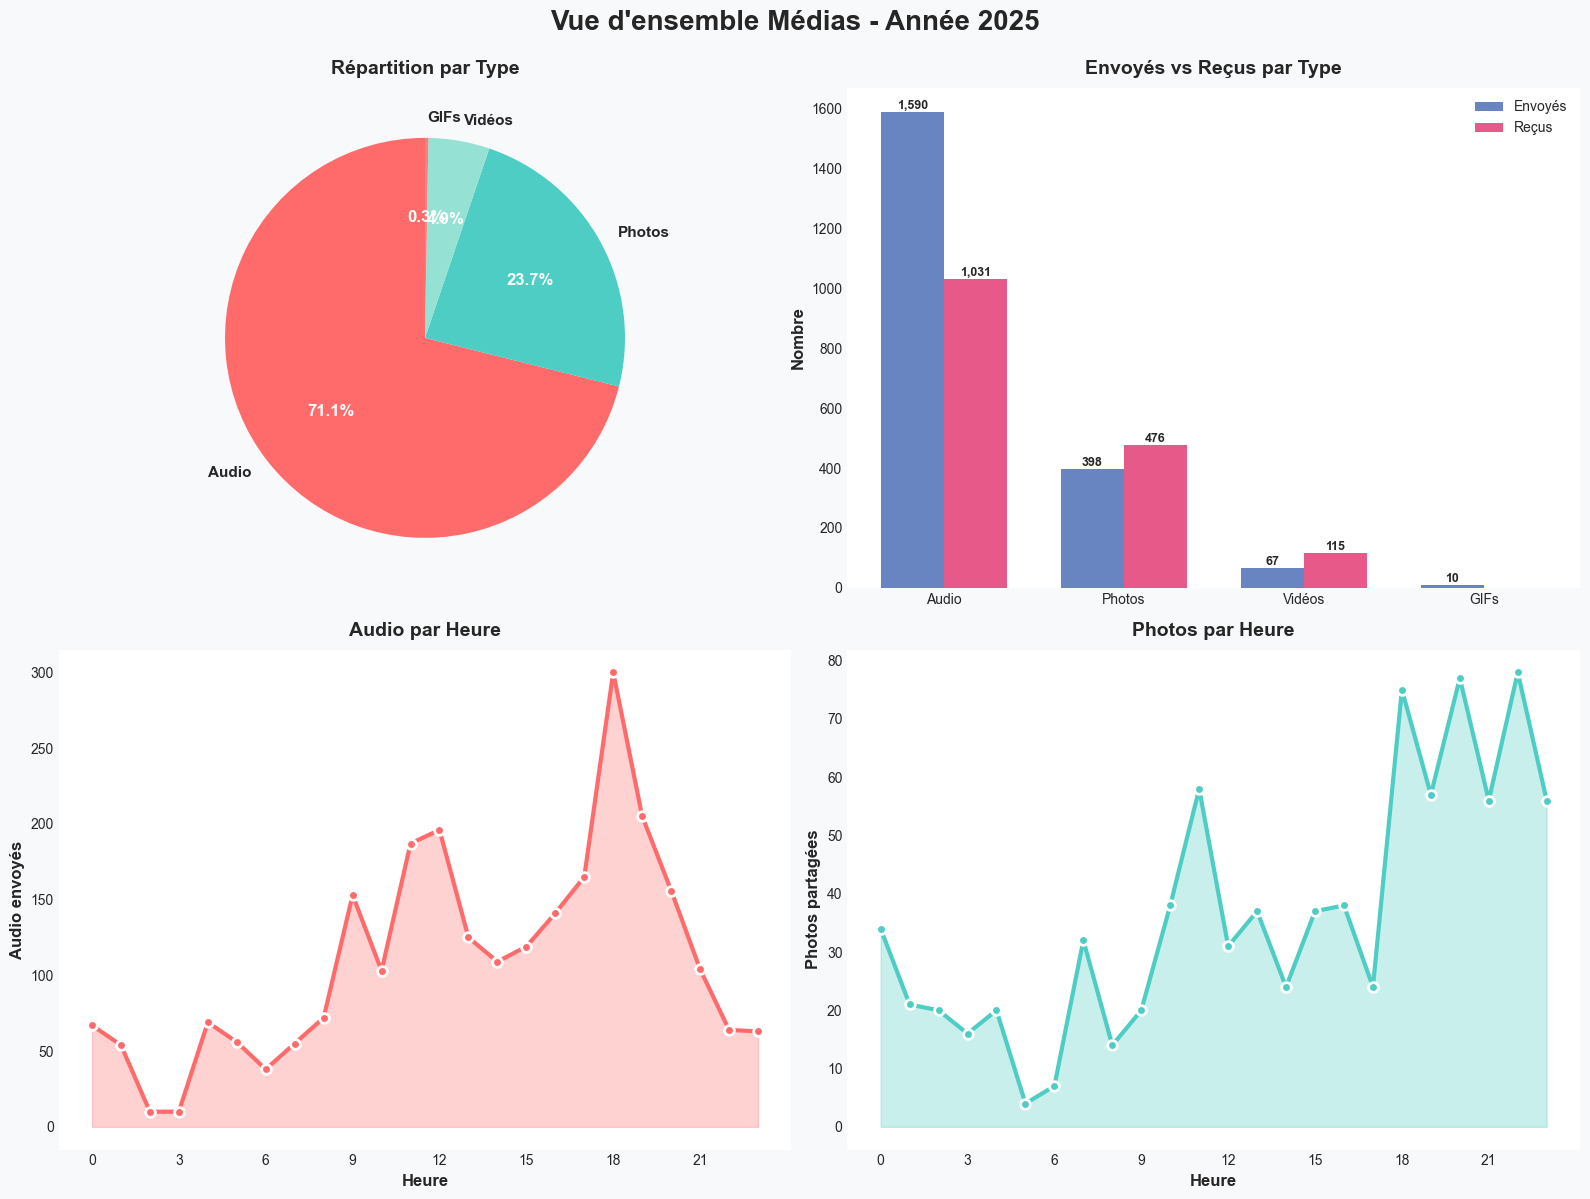


✅ Graphique sauvegardé: medias_overview.png


In [22]:
if total_audio + total_photos + total_videos + total_gifs == 0:
    print("⚠️ Pas de médias pour cette période")
else:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Vue d\'ensemble Médias - {period_text}', fontsize=20, fontweight='bold', y=0.995)
    fig.patch.set_facecolor('#f8f9fa')

    colors_media = {'audio': '#FF6B6B', 'photos': '#4ECDC4', 'videos': '#95E1D3', 'gifs': '#F38181'}

    # 1. Répartition par type de média
    ax1 = axes[0, 0]
    ax1.set_facecolor('white')
    media_types = ['Audio', 'Photos', 'Vidéos', 'GIFs']
    media_counts = [total_audio, total_photos, total_videos, total_gifs]
    colors_list = [colors_media['audio'], colors_media['photos'], colors_media['videos'], colors_media['gifs']]

    wedges, texts, autotexts = ax1.pie(media_counts, labels=media_types, autopct='%1.1f%%',
                                        startangle=90, colors=colors_list,
                                        textprops={'fontsize': 11, 'fontweight': 'bold'})
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    ax1.set_title('Répartition par Type', fontsize=14, fontweight='bold', pad=10)

    # 2. Envoyés vs Reçus
    ax2 = axes[0, 1]
    ax2.set_facecolor('white')
    types = ['Audio', 'Photos', 'Vidéos', 'GIFs']
    sent = [media_stats['total_audio_sent'], media_stats['total_photos_sent'],
            media_stats['total_videos_sent'], media_stats['total_gifs_sent']]
    received = [media_stats['total_audio_received'], media_stats['total_photos_received'],
                media_stats['total_videos_received'], media_stats['total_gifs_received']]

    x = np.arange(len(types))
    width = 0.35

    bars1 = ax2.bar(x - width/2, sent, width, label='Envoyés', color='#4267B2', alpha=0.8)
    bars2 = ax2.bar(x + width/2, received, width, label='Reçus', color='#E1306C', alpha=0.8)

    ax2.set_ylabel('Nombre', fontsize=12, fontweight='bold')
    ax2.set_title('Envoyés vs Reçus par Type', fontsize=14, fontweight='bold', pad=10)
    ax2.set_xticks(x)
    ax2.set_xticklabels(types)
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3, linestyle='--')

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax2.text(bar.get_x() + bar.get_width()/2., height,
                         f'{int(height):,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # 3. Distribution horaire - Audio
    ax3 = axes[1, 0]
    ax3.set_facecolor('white')
    if media_stats["audio_by_hour"]:
        hours = sorted(media_stats["audio_by_hour"].keys())
        hour_counts = [media_stats["audio_by_hour"][h] for h in hours]
        ax3.plot(hours, hour_counts, marker='o', linewidth=3, markersize=7,
                 color=colors_media['audio'], markerfacecolor=colors_media['audio'],
                 markeredgecolor='white', markeredgewidth=2)
        ax3.fill_between(hours, hour_counts, alpha=0.3, color=colors_media['audio'])
        ax3.set_xlabel('Heure', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Audio envoyés', fontsize=12, fontweight='bold')
        ax3.set_title('Audio par Heure', fontsize=14, fontweight='bold', pad=10)
        ax3.set_xticks(range(0, 24, 3))
        ax3.grid(True, alpha=0.3, linestyle='--')
    else:
        ax3.text(0.5, 0.5, 'Pas de données audio', ha='center', va='center', fontsize=14)
        ax3.set_xlim(0, 1)
        ax3.set_ylim(0, 1)

    # 4. Distribution horaire - Photos
    ax4 = axes[1, 1]
    ax4.set_facecolor('white')
    if media_stats["photos_by_hour"]:
        hours = sorted(media_stats["photos_by_hour"].keys())
        hour_counts = [media_stats["photos_by_hour"][h] for h in hours]
        ax4.plot(hours, hour_counts, marker='o', linewidth=3, markersize=7,
                 color=colors_media['photos'], markerfacecolor=colors_media['photos'],
                 markeredgecolor='white', markeredgewidth=2)
        ax4.fill_between(hours, hour_counts, alpha=0.3, color=colors_media['photos'])
        ax4.set_xlabel('Heure', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Photos partagées', fontsize=12, fontweight='bold')
        ax4.set_title('Photos par Heure', fontsize=14, fontweight='bold', pad=10)
        ax4.set_xticks(range(0, 24, 3))
        ax4.grid(True, alpha=0.3, linestyle='--')
    else:
        ax4.text(0.5, 0.5, 'Pas de données photos', ha='center', va='center', fontsize=14)
        ax4.set_xlim(0, 1)
        ax4.set_ylim(0, 1)

    plt.tight_layout()
    plt.savefig('medias_overview.png', dpi=150, bbox_inches='tight', facecolor='#f8f9fa')
    plt.show()

    print("\n✅ Graphique sauvegardé: medias_overview.png")

### 📊 Top Conversations par Type de Média

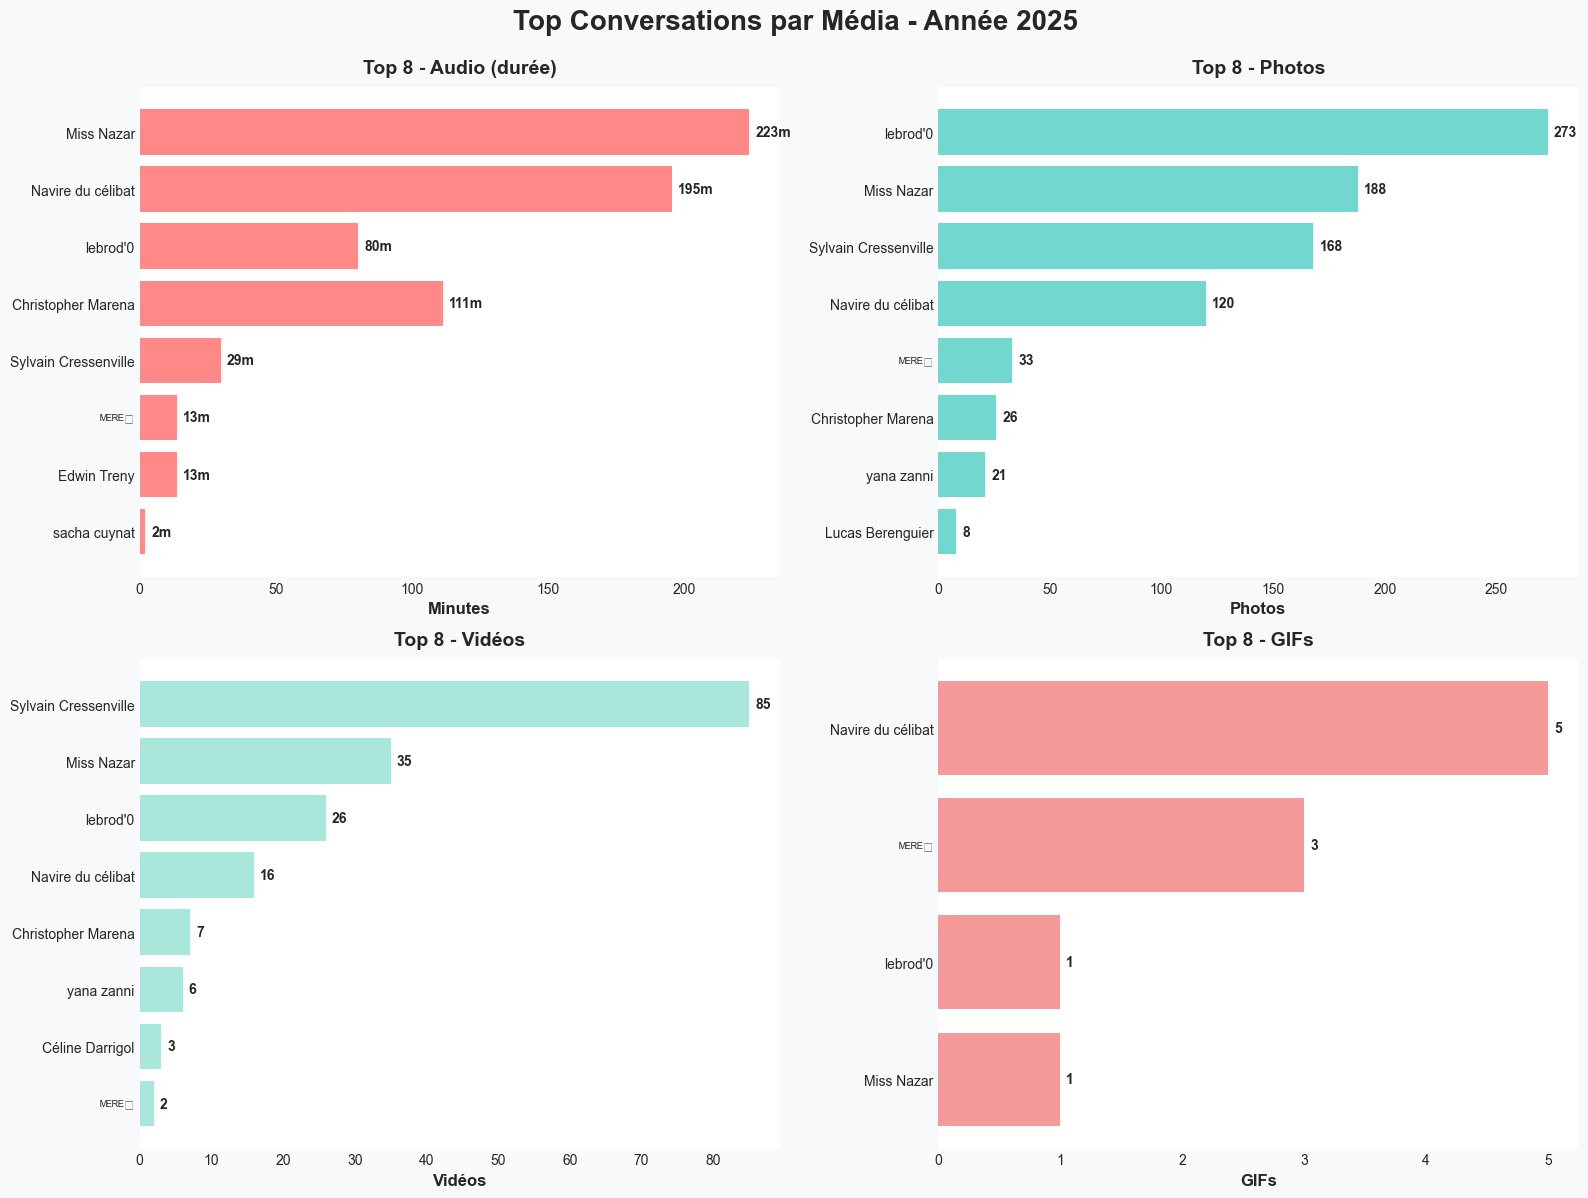


✅ Graphique sauvegardé: medias_top_conversations.png


In [23]:
if total_audio + total_photos + total_videos + total_gifs > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Top Conversations par Média - {period_text}', fontsize=20, fontweight='bold', y=0.995)
    fig.patch.set_facecolor('#f8f9fa')

    # 1. Top Audio
    ax1 = axes[0, 0]
    ax1.set_facecolor('white')
    top_audio = media_stats["conversations_audio"][:8]
    if top_audio:
        names = [c['name'][:20] for c in top_audio]
        durations = [(c['duration_sent'] + c['duration_received']) / 60 for c in top_audio]
        bars = ax1.barh(names, durations, color=colors_media['audio'], alpha=0.8)
        ax1.set_xlabel('Minutes', fontsize=12, fontweight='bold')
        ax1.set_title('Top 8 - Audio (durée)', fontsize=14, fontweight='bold', pad=10)
        ax1.invert_yaxis()
        ax1.grid(axis='x', alpha=0.3, linestyle='--')
        for bar, duration in zip(bars, durations):
            width = bar.get_width()
            if width > 0:
                ax1.text(width + max(durations)*0.01, bar.get_y() + bar.get_height()/2,
                         f'{int(duration)}m', va='center', fontweight='bold', fontsize=10)
    else:
        ax1.text(0.5, 0.5, 'Pas de données', ha='center', va='center', fontsize=14)
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)

    # 2. Top Photos
    ax2 = axes[0, 1]
    ax2.set_facecolor('white')
    top_photos = media_stats["conversations_photos"][:8]
    if top_photos:
        names = [c['name'][:20] for c in top_photos]
        totals = [c['sent'] + c['received'] for c in top_photos]
        bars = ax2.barh(names, totals, color=colors_media['photos'], alpha=0.8)
        ax2.set_xlabel('Photos', fontsize=12, fontweight='bold')
        ax2.set_title('Top 8 - Photos', fontsize=14, fontweight='bold', pad=10)
        ax2.invert_yaxis()
        ax2.grid(axis='x', alpha=0.3, linestyle='--')
        for bar, count in zip(bars, totals):
            width = bar.get_width()
            if width > 0:
                ax2.text(width + max(totals)*0.01, bar.get_y() + bar.get_height()/2,
                         f'{count:,}', va='center', fontweight='bold', fontsize=10)
    else:
        ax2.text(0.5, 0.5, 'Pas de données', ha='center', va='center', fontsize=14)
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)

    # 3. Top Vidéos
    ax3 = axes[1, 0]
    ax3.set_facecolor('white')
    top_videos = media_stats["conversations_videos"][:8]
    if top_videos:
        names = [c['name'][:20] for c in top_videos]
        counts = [c['sent'] + c['received'] for c in top_videos]
        bars = ax3.barh(names, counts, color=colors_media['videos'], alpha=0.8)
        ax3.set_xlabel('Vidéos', fontsize=12, fontweight='bold')
        ax3.set_title('Top 8 - Vidéos', fontsize=14, fontweight='bold', pad=10)
        ax3.invert_yaxis()
        ax3.grid(axis='x', alpha=0.3, linestyle='--')
        for bar, count in zip(bars, counts):
            width = bar.get_width()
            if width > 0:
                ax3.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2,
                         f'{count}', va='center', fontweight='bold', fontsize=10)
    else:
        ax3.text(0.5, 0.5, 'Pas de données', ha='center', va='center', fontsize=14)
        ax3.set_xlim(0, 1)
        ax3.set_ylim(0, 1)

    # 4. Top GIFs
    ax4 = axes[1, 1]
    ax4.set_facecolor('white')
    top_gifs = media_stats["conversations_gifs"][:8]
    if top_gifs:
        names = [c['name'][:20] for c in top_gifs]
        counts = [c['sent'] + c['received'] for c in top_gifs]
        bars = ax4.barh(names, counts, color=colors_media['gifs'], alpha=0.8)
        ax4.set_xlabel('GIFs', fontsize=12, fontweight='bold')
        ax4.set_title('Top 8 - GIFs', fontsize=14, fontweight='bold', pad=10)
        ax4.invert_yaxis()
        ax4.grid(axis='x', alpha=0.3, linestyle='--')
        for bar, count in zip(bars, counts):
            width = bar.get_width()
            if width > 0:
                ax4.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2,
                         f'{count}', va='center', fontweight='bold', fontsize=10)
    else:
        ax4.text(0.5, 0.5, 'Pas de données', ha='center', va='center', fontsize=14)
        ax4.set_xlim(0, 1)
        ax4.set_ylim(0, 1)

    plt.tight_layout()
    plt.savefig('medias_top_conversations.png', dpi=150, bbox_inches='tight', facecolor='#f8f9fa')
    plt.show()

    print("\n✅ Graphique sauvegardé: medias_top_conversations.png")

### 📊 Evolution Mensuelle des Médias

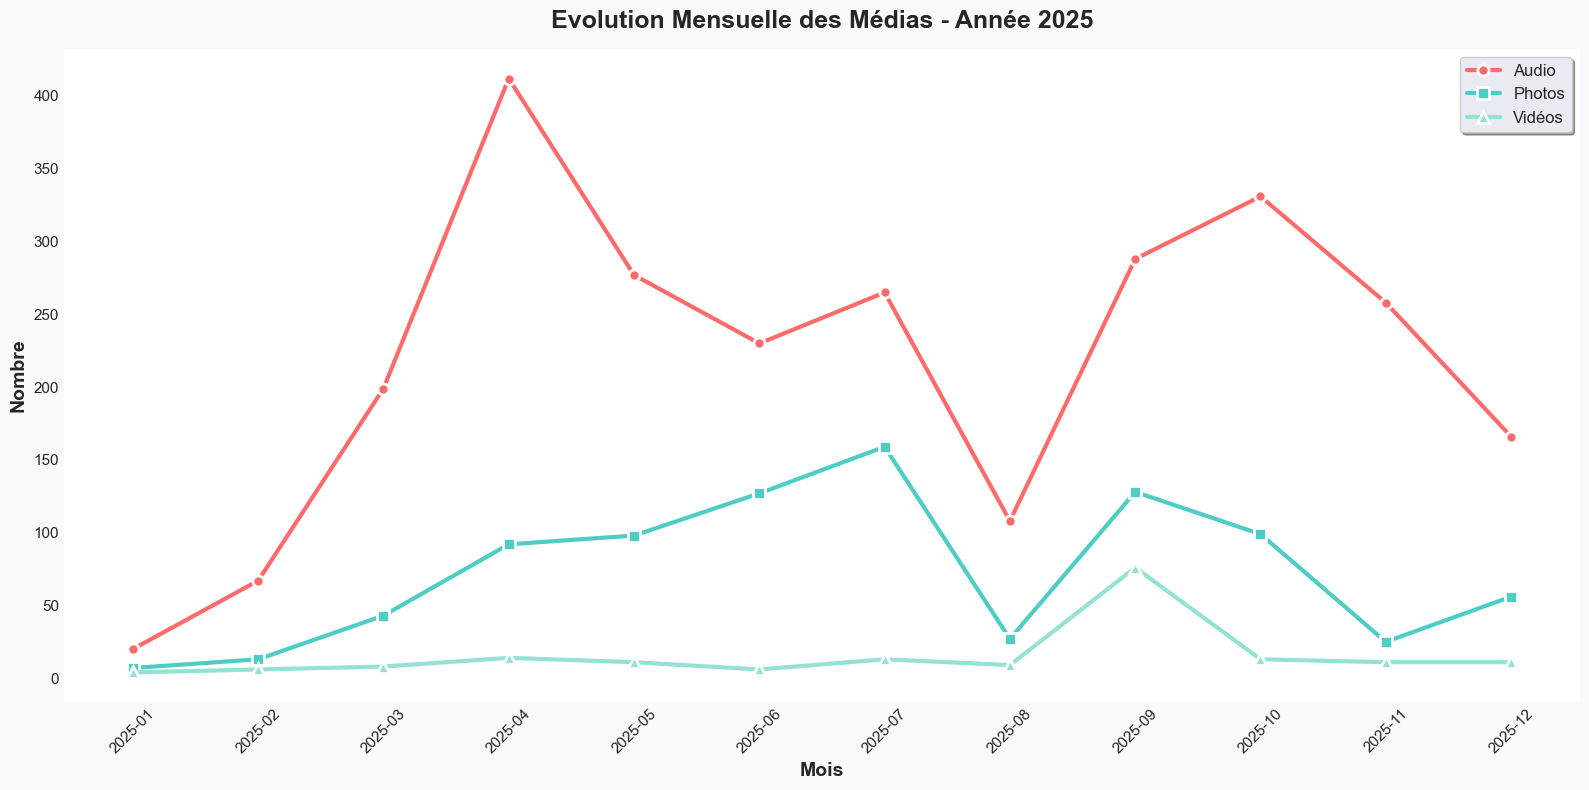


✅ Graphique sauvegardé: medias_evolution_mensuelle.png


In [24]:
if total_audio + total_photos + total_videos > 0:
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('#f8f9fa')
    ax.set_facecolor('white')

    # Récupérer tous les mois
    all_months = sorted(set(list(media_stats["audio_by_month"].keys()) +
                            list(media_stats["photos_by_month"].keys()) +
                            list(media_stats["videos_by_month"].keys())))

    if all_months:
        # Compter par mois
        audio_counts = [media_stats["audio_by_month"][m] for m in all_months]
        photos_counts = [media_stats["photos_by_month"][m] for m in all_months]
        videos_counts = [media_stats["videos_by_month"][m] for m in all_months]

        # Tracer
        ax.plot(all_months, audio_counts, marker='o', linewidth=3, markersize=8,
                label='Audio', color=colors_media['audio'], markerfacecolor=colors_media['audio'],
                markeredgecolor='white', markeredgewidth=2)
        ax.plot(all_months, photos_counts, marker='s', linewidth=3, markersize=8,
                label='Photos', color=colors_media['photos'], markerfacecolor=colors_media['photos'],
                markeredgecolor='white', markeredgewidth=2)
        ax.plot(all_months, videos_counts, marker='^', linewidth=3, markersize=8,
                label='Vidéos', color=colors_media['videos'], markerfacecolor=colors_media['videos'],
                markeredgecolor='white', markeredgewidth=2)

        ax.set_xlabel('Mois', fontsize=14, fontweight='bold')
        ax.set_ylabel('Nombre', fontsize=14, fontweight='bold')
        ax.set_title(f'Evolution Mensuelle des Médias - {period_text}', fontsize=18, fontweight='bold', pad=15)
        ax.legend(loc='best', fontsize=12, frameon=True, shadow=True)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.tick_params(axis='x', rotation=45, labelsize=11)
        ax.tick_params(axis='y', labelsize=11)

        plt.tight_layout()
        plt.savefig('medias_evolution_mensuelle.png', dpi=150, bbox_inches='tight', facecolor='#f8f9fa')
        plt.show()

        print("\n✅ Graphique sauvegardé: medias_evolution_mensuelle.png")
    else:
        print("⚠️ Pas assez de données pour l'évolution mensuelle")

### 🎉 Résumé Final

In [25]:
print(f"\n" + "="*60)
print(f"📊 RÉSUMÉ COMPLET - {period_text}")
print("="*60)

print(f"\n💬 MESSAGES")
print(f"  Total: {stats['total_messages']:,} messages")
print(f"  Conversations: {stats['total_conversations']}")

print(f"\n❤️ RÉACTIONS")
print(f"  Total: {reactions_stats['reactions_given'] + reactions_stats['reactions_received']:,}")

print(f"\n🎙️ MÉDIAS")
print(f"  Audio: {total_audio:,} ({format_duration(total_audio_duration)})")
print(f"  Photos: {total_photos:,}")
print(f"  Vidéos: {total_videos:,} ({format_duration(total_videos_duration)})")
print(f"  GIFs: {total_gifs:,}")
print(f"  Partages: {total_shares:,}")

total_medias = total_audio + total_photos + total_videos + total_gifs
print(f"\n📦 TOTAL GÉNÉRAL")
print(f"  Médias: {total_medias:,}")
print(f"  Messages + Réactions + Médias: {stats['total_messages'] + reactions_stats['reactions_given'] + reactions_stats['reactions_received'] + total_medias:,} interactions")

print(f"\n📁 FICHIERS GÉNÉRÉS")
files_generated = [
    "top5_evolution_mensuelle.png",
    "messages_stats.png",
    "reactions_stats.png",
    "medias_overview.png",
    "medias_top_conversations.png",
    "medias_evolution_mensuelle.png"
]
for f in files_generated:
    print(f"  ✓ {f}")

print("\n✅ Analyse complète terminée!")


📊 RÉSUMÉ COMPLET - Année 2025

💬 MESSAGES
  Total: 21,616 messages
  Conversations: 98

❤️ RÉACTIONS
  Total: 6,052

🎙️ MÉDIAS
  Audio: 2,621 (12h 6m 38s)
  Photos: 874
  Vidéos: 182 (54m 18s)
  GIFs: 10
  Partages: 6,150

📦 TOTAL GÉNÉRAL
  Médias: 3,687
  Messages + Réactions + Médias: 31,355 interactions

📁 FICHIERS GÉNÉRÉS
  ✓ top5_evolution_mensuelle.png
  ✓ messages_stats.png
  ✓ reactions_stats.png
  ✓ medias_overview.png
  ✓ medias_top_conversations.png
  ✓ medias_evolution_mensuelle.png

✅ Analyse complète terminée!


## 🎉 Analyse Terminée!

### 📁 Fichiers générés:
- `top5_evolution_mensuelle.png`
- `messages_stats.png`
- `reactions_stats.png`

### 💡 Pour changer de période:
Retournez dans la première cellule et modifiez les paramètres `YEAR_FILTER`, `START_DATE`, ou `END_DATE`, puis ré-exécutez toutes les cellules.